In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import re
import ast

In [2]:
csv_path = [
   "../../Raw_CSV/April 25-26 - 2022/Jobstreet/Jobstreet-singer.csv",
   "../../Raw_CSV/April 27 - 2022/Jobstreet/Jobstreet-singer.csv",
    "../../Raw_CSV/April 28 - 2022/Jobstreet/Jobstreet-singer.csv", 
]
merge = pd.concat(map(pd.read_csv,csv_path),ignore_index=True)
merge["Salary"].str.strip()
merge

,Title,Company,Location,Summary,Salary,Qualification & Skills,Role and Responsibilities,Job Type,Company Profile&Job Desc,Career Level,Benefits,Company Size
0,2yrs in College for CSR w/ or w/out BPO exp - ...,Southgate Premiere,Quezon City,WOSA or WAHA depending on training perormance,"PHP 17,000 - PHP 18,000",['WOSA or WAHA depending on training perormanc...,['2yrs in College for CSR w/ or w/out BPO exp ...,"['Full-Time', 'Average Processing Time']",['2yrs in College for CSR w/ or w/out BPO exp ...,Less than 1 Year Experienced Employee,[],1 - 50 Employees
1,Spanish Speaking Sr. Analyst (w/ Learning Deve...,Accenture,National Capital Reg,Deliver high-quality training to audiences usi...,None,['Deliver high-quality training to audiences u...,[],"['Full-Time', 'Average Processing Time']","['JOIN ACCENTURE AND GET- 45,000PHP* SIGNING B...",1-4 Years Experienced Employee,"['Dental, Miscellaneous allowance, Medical, Em...",None
2,15 USRN|TEMPORARY WORK AT HOME|W/ 1 YR CLINICA...,Southgate Premiere,National Capital Reg,Work is computer-based and includes receiving ...,"PHP 40,000 - PHP 43,000",['Work is computer-based and includes receivin...,"['USRN', 'Primary Responsibilities:', 'Require...","['Full-Time', 'Average Processing Time']",['USRNPrimary Responsibilities:Work is compute...,1-4 Years Experienced Employee,['Working knowledge of Medical Terminology to ...,1 - 50 Employees
3,15 USRN|TEMPORARY WORK AT HOME|W/ 1 YR CLINICA...,Southgate Premiere,National Capital Reg,None,"PHP 40,000 - PHP 43,000",[],[],"['Full-Time', 'Average Processing Time']",['QUALIFICATION•\xa0 Active Mainland\xa0 or no...,1-4 Years Experienced Employee,['Practitioner/Medical Asst'],1 - 50 Employees
4,Spanish Speaking Sr. Analyst (w/ Learning Deve...,Accenture,National Capital Reg,Deliver high-quality training to audiences usi...,None,['Deliver high-quality training to audiences u...,[],"['Full-Time', 'Average Processing Time']","['JOIN ACCENTURE AND GET- 45,000PHP* SIGNING B...",1-4 Years Experienced Employee,"['Dental, Miscellaneous allowance, Medical, Em...",None
5,15 USRN|TEMPORARY WORK AT HOME|W/ 1 YR CLINICA...,Southgate Premiere,Quezon City,Work is computer-based and includes receiving ...,"PHP 17,000 - PHP 18,000",['Work is computer-based and includes receivin...,"['USRN', 'Primary Responsibilities:', 'Require...","['Full-Time', 'Average Processing Time']",['2yrs in College for CSR w/ or w/out BPO exp ...,Less than 1 Year Experienced Employee,[],1 - 50 Employees
6,15 USRN|TEMPORARY WORK AT HOME|W/ 1 YR CLINICA...,Southgate Premiere,National Capital Reg,Work is computer-based and includes receiving ...,"PHP 40,000 - PHP 43,000",['Work is computer-based and includes receivin...,[],"['Full-Time', 'Average Processing Time']",['USRNPrimary Responsibilities:Work is compute...,1-4 Years Experienced Employee,['Working knowledge of Medical Terminology to ...,1 - 50 Employees
7,15 USRN|TEMPORARY WORK AT HOME|W/ 1 YR CLINICA...,Southgate Premiere,National Capital Reg,Work is computer-based and includes receiving ...,"PHP 40,000 - PHP 43,000",['Work is computer-based and includes receivin...,[],"['Full-Time', 'Average Processing Time']",['USRNPrimary Responsibilities:Work is compute...,1-4 Years Experienced Employee,['Working knowledge of Medical Terminology to ...,1 - 50 Employees
8,15 USRN|TEMPORARY WORK AT HOME|W/ 1 YR CLINICA...,Southgate Premiere,National Capital Reg,Work is computer-based and includes receiving ...,"PHP 40,000 - PHP 43,000",['Work is computer-based and includes receivin...,[],"['Full-Time', 'Average Processing Time']",['USRNPrimary Responsibilities:Work is compute...,1-4 Years Experienced Employee,['Working knowledge of Medical Terminology to ...,1 - 50 Employees
9,15 USRN|TEMPORARY WORK AT HOME|W/ 1 YR CLINICA...,Southgate Premiere,National Capital Reg,None,"PHP 40,000 - PHP 43,000",[],[],"['Full-Time', 'Average Processing Time']",['QUALIFICATION•\xa0 Active Mainland\xa0 or no...,1-4 Years Experienced Employee,['Practitioner/Medical Asst

In [3]:
merge

,Title,Company,Location,Summary,Salary,Qualification & Skills,Role and Responsibilities,Job Type,Company Profile&Job Desc,Career Level,Benefits,Company Size
0,2yrs in College for CSR w/ or w/out BPO exp - ...,Southgate Premiere,Quezon City,WOSA or WAHA depending on training perormance,"PHP 17,000 - PHP 18,000",['WOSA or WAHA depending on training perormanc...,['2yrs in College for CSR w/ or w/out BPO exp ...,"['Full-Time', 'Average Processing Time']",['2yrs in College for CSR w/ or w/out BPO exp ...,Less than 1 Year Experienced Employee,[],1 - 50 Employees
1,Spanish Speaking Sr. Analyst (w/ Learning Deve...,Accenture,National Capital Reg,Deliver high-quality training to audiences usi...,None,['Deliver high-quality training to audiences u...,[],"['Full-Time', 'Average Processing Time']","['JOIN ACCENTURE AND GET- 45,000PHP* SIGNING B...",1-4 Years Experienced Employee,"['Dental, Miscellaneous allowance, Medical, Em...",None
2,15 USRN|TEMPORARY WORK AT HOME|W/ 1 YR CLINICA...,Southgate Premiere,National Capital Reg,Work is computer-based and includes receiving ...,"PHP 40,000 - PHP 43,000",['Work is computer-based and includes receivin...,"['USRN', 'Primary Responsibilities:', 'Require...","['Full-Time', 'Average Processing Time']",['USRNPrimary Responsibilities:Work is compute...,1-4 Years Experienced Employee,['Working knowledge of Medical Terminology to ...,1 - 50 Employees
3,15 USRN|TEMPORARY WORK AT HOME|W/ 1 YR CLINICA...,Southgate Premiere,National Capital Reg,None,"PHP 40,000 - PHP 43,000",[],[],"['Full-Time', 'Average Processing Time']",['QUALIFICATION•\xa0 Active Mainland\xa0 or no...,1-4 Years Experienced Employee,['Practitioner/Medical Asst'],1 - 50 Employees
4,Spanish Speaking Sr. Analyst (w/ Learning Deve...,Accenture,National Capital Reg,Deliver high-quality training to audiences usi...,None,['Deliver high-quality training to audiences u...,[],"['Full-Time', 'Average Processing Time']","['JOIN ACCENTURE AND GET- 45,000PHP* SIGNING B...",1-4 Years Experienced Employee,"['Dental, Miscellaneous allowance, Medical, Em...",None
5,15 USRN|TEMPORARY WORK AT HOME|W/ 1 YR CLINICA...,Southgate Premiere,Quezon City,Work is computer-based and includes receiving ...,"PHP 17,000 - PHP 18,000",['Work is computer-based and includes receivin...,"['USRN', 'Primary Responsibilities:', 'Require...","['Full-Time', 'Average Processing Time']",['2yrs in College for CSR w/ or w/out BPO exp ...,Less than 1 Year Experienced Employee,[],1 - 50 Employees
6,15 USRN|TEMPORARY WORK AT HOME|W/ 1 YR CLINICA...,Southgate Premiere,National Capital Reg,Work is computer-based and includes receiving ...,"PHP 40,000 - PHP 43,000",['Work is computer-based and includes receivin...,[],"['Full-Time', 'Average Processing Time']",['USRNPrimary Responsibilities:Work is compute...,1-4 Years Experienced Employee,['Working knowledge of Medical Terminology to ...,1 - 50 Employees
7,15 USRN|TEMPORARY WORK AT HOME|W/ 1 YR CLINICA...,Southgate Premiere,National Capital Reg,Work is computer-based and includes receiving ...,"PHP 40,000 - PHP 43,000",['Work is computer-based and includes receivin...,[],"['Full-Time', 'Average Processing Time']",['USRNPrimary Responsibilities:Work is compute...,1-4 Years Experienced Employee,['Working knowledge of Medical Terminology to ...,1 - 50 Employees
8,15 USRN|TEMPORARY WORK AT HOME|W/ 1 YR CLINICA...,Southgate Premiere,National Capital Reg,Work is computer-based and includes receiving ...,"PHP 40,000 - PHP 43,000",['Work is computer-based and includes receivin...,[],"['Full-Time', 'Average Processing Time']",['USRNPrimary Responsibilities:Work is compute...,1-4 Years Experienced Employee,['Working knowledge of Medical Terminology to ...,1 - 50 Employees
9,15 USRN|TEMPORARY WORK AT HOME|W/ 1 YR CLINICA...,Southgate Premiere,National Capital Reg,None,"PHP 40,000 - PHP 43,000",[],[],"['Full-Time', 'Average Processing Time']",['QUALIFICATION•\xa0 Active Mainland\xa0 or no...,1-4 Years Experienced Employee,['Practitioner/Medical Asst

In [4]:
merge.describe()

,Title,Company,Location,Summary,Salary,Qualification & Skills,Role and Responsibilities,Job Type,Company Profile&Job Desc,Career Level,Benefits,Company Size
count,49,49,49,49,49,49,49,49,49,49,49,49
unique,8,5,4,7,4,8,6,2,11,2,5,3
top,15 USRN|TEMPORARY WORK AT HOME|W/ 1 YR CLINICA...,Southgate Premiere,National Capital Reg,Work is computer-based and includes receiving ...,"PHP 40,000 - PHP 43,000",['Work is computer-based and includes receivin...,[],"['Full-Time', 'Average Processing Time']",['USRNPrimary Responsibilities:Work is compute...,1-4 Years Experienced Employee,['Working knowledge of Medical Terminology to ...,1 - 50 Employees
freq,29,35,33,24,28,19,23,46,15,43,24,35


In [5]:
job_title_lower = merge["Title"].str.lower()

In [6]:
job_title = job_title_lower.value_counts()[0:10]

In [7]:
job_title

15 usrn|temporary work at home|w/ 1 yr clinical|43k+100k singing bonus              29
2yrs in college for csr w/ or w/out bpo exp - 17k+1k+20k signing bonus               4
campus minister                                                                      3
community ambassador - quezon city                                                   3
community ambassador - meycauayan bulacan                                            3
it service desk - project based (bpo) earn up to 46k! with signing bonus!            3
spanish speaking sr. analyst (w/ learning developer exp) singing bonus (ml 1550)     2
2yrs in college for csr w/ or w/out bpo exp 17k+1k+20ksigning bonus                  2
Name: Title, dtype: int64

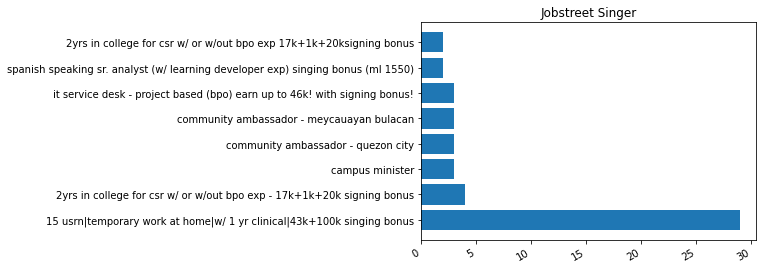

In [8]:
plt.barh(job_title.index, job_title.values)
plt.title("Jobstreet Singer")
plt.xticks(rotation="30", ha="right")
plt.show()

In [9]:
company_name = merge["Company"].value_counts()[0:10]

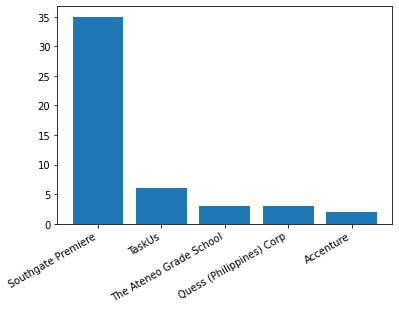

In [10]:
plt.bar(company_name.index, company_name.values)
plt.xticks(rotation="30", ha="right")
plt.show()

In [11]:
company_location = merge["Location"].value_counts()[0:10]

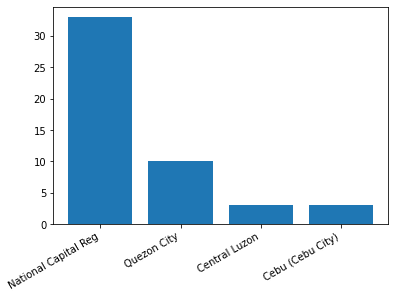

In [12]:
plt.bar(company_location.index, company_location.values)
plt.xticks(rotation="30", ha="right")
plt.show()


In [13]:
filt = (merge["Salary"] != "None")
results = merge.loc[filt]

In [14]:
salary = results["Salary"].value_counts()[0:10]

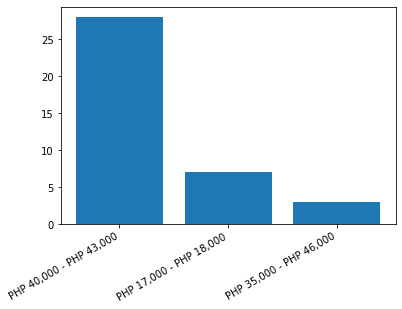

In [15]:
plt.bar(salary.index, salary.values)
plt.xticks(rotation="30", ha="right")
plt.show()

In [16]:
job_type = merge["Job Type"].apply(ast.literal_eval)
job_type_append = []
for i in job_type:
    job_type_append.append(job_type[0][0])

In [17]:
# List to Dataframe ( Count Job Type )
job_type_df = pd.DataFrame(job_type_append,columns=["Job Type"])
job_type_df.value_counts()


Job Type 
Full-Time    49
dtype: int64

In [18]:
career_level = merge["Career Level"]
count_career_level = career_level.value_counts()
count_career_level

1-4 Years Experienced Employee           43
Less than 1 Year Experienced Employee     6
Name: Career Level, dtype: int64

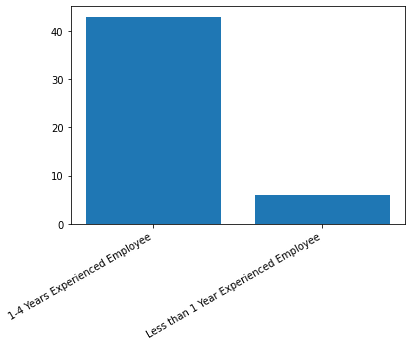

In [19]:
plt.bar(count_career_level.index, count_career_level.values)
plt.xticks(rotation="30",ha="right")
plt.show()

In [20]:
company_size = merge["Company Size"]
count_company_size = company_size.value_counts()[0:6]
count_company_size

1 - 50 Employees       35
None                   11
201 - 500 Employees     3
Name: Company Size, dtype: int64

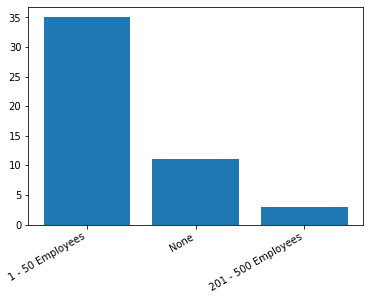

In [21]:
plt.bar(count_company_size.index, count_company_size.values)
plt.xticks(rotation="30",ha="right")
plt.show()

In [22]:
benefits = merge["Benefits"].str.replace("^\['|'\]$","")
benefits_append = []
split_benefits = benefits.str.split(",")

for i in range(len(split_benefits)):
    for j in split_benefits[i]:
        benefits_append.append(j)


/var/folders/tc/qdg72rpx523gjsqcr2vf_0c00000gn/T/ipykernel_3728/2971443327.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  benefits = merge["Benefits"].str.replace("^\['|'\]$","")


In [23]:
benefits_df = pd.DataFrame(benefits_append, columns=["Benefits"])
benefits_df = benefits_df["Benefits"].str.strip()
filt = (benefits_df != "[]")
benefits_df = benefits_df.loc[filt]
benefits_count = benefits_df.value_counts()[0:15]
benefits_count



Working knowledge of Medical Terminology to communicate with members and providers'    24
'Practitioner/Medical Asst                                                             24
Miscellaneous allowance                                                                 8
Dental                                                                                  8
Medical                                                                                 8
Education support                                                                       6
Loans                                                                                   6
Sports (e.g. Gym)                                                                       6
Parking                                                                                 6
Vision                                                                                  6
Formal (e.g. Shirts + Ties)                                                             6
Practition

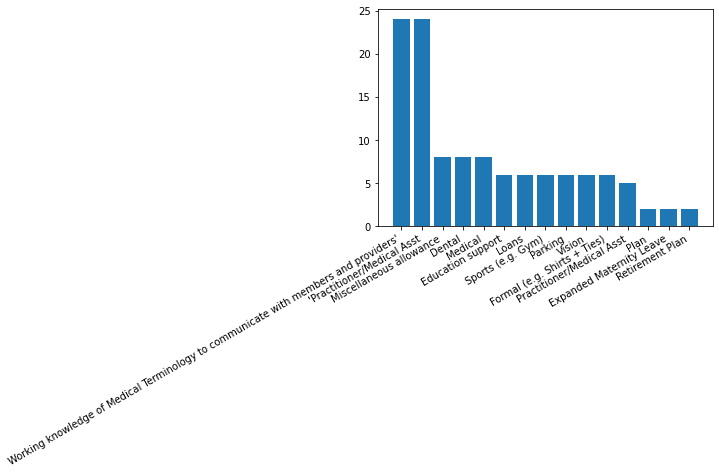

In [24]:
plt.bar(benefits_count.index, benefits_count.values)
plt.xticks(rotation="30",ha="right")
plt.show()

In [25]:
filt = (merge["Salary"] != "None")
salary_career_level = merge[filt].sort_values(by="Salary",ascending=True)
count = salary_career_level[["Title","Salary","Career Level"]]



In [26]:
merge["Career Level"].value_counts()

1-4 Years Experienced Employee           43
Less than 1 Year Experienced Employee     6
Name: Career Level, dtype: int64

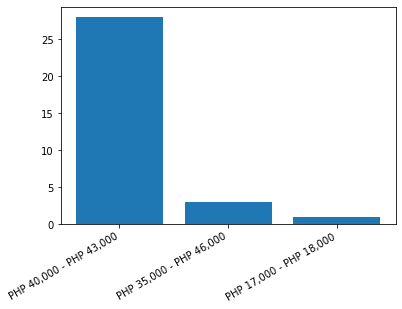

In [27]:
mid_level = merge.loc[merge["Career Level"] == "1-4 Years Experienced Employee"]
mid_level_salary = mid_level[mid_level["Salary"] != "None"]
count_mid = mid_level_salary["Salary"].value_counts()[0:10]
plt.bar(count_mid.index, count_mid.values)
plt.xticks(rotation="30",ha="right")
plt.show()

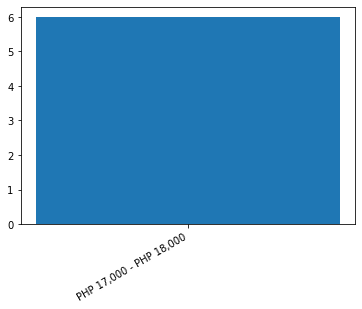

In [28]:
low_level = merge.loc[merge["Career Level"] == "Less than 1 Year Experienced Employee"]
low_level_salary = low_level[low_level["Salary"] != "None"]
count_low = low_level_salary["Salary"].value_counts()[0:10]

plt.bar(count_low.index, count_low.values)
plt.xticks(rotation="30",ha="right")
plt.show()

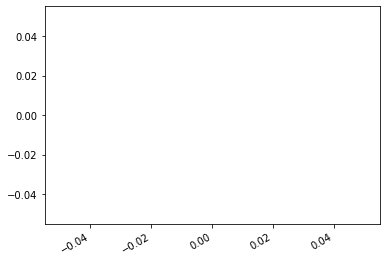

In [29]:
high_level = merge.loc[merge["Career Level"] == "Supervisor/5 Years & Up Experienced Employee"]
high_level_salary = high_level[high_level["Salary"] != "None"]
count_high = high_level_salary["Salary"].value_counts()[0:10]
plt.bar(count_high.index, count_high.values)
plt.xticks(rotation="30",ha="right")
plt.show()